In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)


In [2]:
%pip install -q pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [4]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[(df.innings == 1) | (df.innings == 2) ]

In [6]:
df.innings.unique()

array([2, 1])

In [ ]:
# Dhoni's score over years


In [7]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [8]:
df[df.batting_team == 'Chennai Super Kings'].striker.unique()

array(['MEK Hussey', 'JDP Oram', 'SK Raina', 'S Badrinath', 'ML Hayden',
       'PA Patel', 'MS Dhoni', 'JA Morkel', 'S Vidyut', 'SP Fleming',
       'MS Gony', 'Joginder Sharma', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'T Thushara', 'A Flintoff', 'SB Jakati', 'M Vijay', 'GJ Bailey',
       'R Ashwin', 'S Tyagi', 'JM Kemp', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'RA Jadeja', 'F du Plessis', 'KMDN Kulasekara', 'AS Rajpoot',
       'B Laughlin', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'A Nehra', 'P Negi', 'RG More',
       'KM Jadhav', 'AT Rayudu', 'SR Watson', 'MA Wood', 'Imran Tahir',
       'DL Chahar', 'Harbhajan Singh', 'SW Billings', 'DR Shorey',
       'SN Thakur', 'MJ Santner', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali', 'RV Uthappa', 'S Dube', 'DP Conway',
       'D Pretorius', 'CJ Jordan', 'Mukesh Choudh

In [10]:
df_2022 = df[df.season == 2022]

In [11]:
df_2022.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208041,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.1,Kolkata Knight Riders,Chennai Super Kings,VR Iyer,AM Rahane,TU Deshpande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208042,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.2,Kolkata Knight Riders,Chennai Super Kings,VR Iyer,AM Rahane,TU Deshpande,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208043,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.3,Kolkata Knight Riders,Chennai Super Kings,VR Iyer,AM Rahane,TU Deshpande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208044,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.4,Kolkata Knight Riders,Chennai Super Kings,AM Rahane,VR Iyer,TU Deshpande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208045,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.5,Kolkata Knight Riders,Chennai Super Kings,AM Rahane,VR Iyer,TU Deshpande,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Runs scored by each batsmen in season 2022
df_2022_1 = pd.DataFrame(df_2022.groupby('striker')['runs_off_bat'].sum()).reset_index()


In [19]:
df_2022_1.head()

,striker,runs_off_bat
0,A Badoni,161
1,A Manohar,108
2,A Nortje,1
3,A Tomar,4
4,AD Russell,335


In [20]:
df_2022_2 = pd.DataFrame(df_2022.groupby('striker')['ball'].count()).reset_index()

In [21]:
df_2022_2.head()

,striker,ball
0,A Badoni,139
1,A Manohar,79
2,A Nortje,7
3,A Tomar,8
4,AD Russell,200


In [23]:
df_2022_3 = df_2022_1.merge(df_2022_2,on ='striker', how='left')

In [24]:
df_2022_3.head()

,striker,runs_off_bat,ball
0,A Badoni,161,139
1,A Manohar,108,79
2,A Nortje,1,7
3,A Tomar,4,8
4,AD Russell,335,200


In [25]:
df_2022_3['strike_rate']= 100*df_2022_3['runs_off_bat']/df_2022_3['ball']

In [26]:
df_2022_3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,161,139,115.827338
1,A Manohar,108,79,136.708861
2,A Nortje,1,7,14.285714
3,A Tomar,4,8,50.000000
4,AD Russell,335,200,167.500000


In [31]:
df_2022_3.reset_index(inplace=True, drop=True)

In [29]:
df_2022_3 = df_2022_3[df_2022_3.ball >=30]

In [32]:
df_2022_3.sort_values('strike_rate', ascending=False)

,striker,runs_off_bat,ball,strike_rate
80,Rashid Khan,91,44,206.818182
97,TH David,186,91,204.395604
88,SP Narine,71,40,177.500000
36,KD Karthik,330,188,175.531915
2,AD Russell,335,200,167.500000
41,LS Livingstone,437,261,167.432950
24,GJ Maxwell,301,184,163.586957
30,JD Unadkat,59,37,159.459459
32,JM Sharma,234,149,157.046980
71,RA Tripathi,413,271,152.398524


##Visualization##


AttributeError: 'DataFrame' object has no attribute 'season'

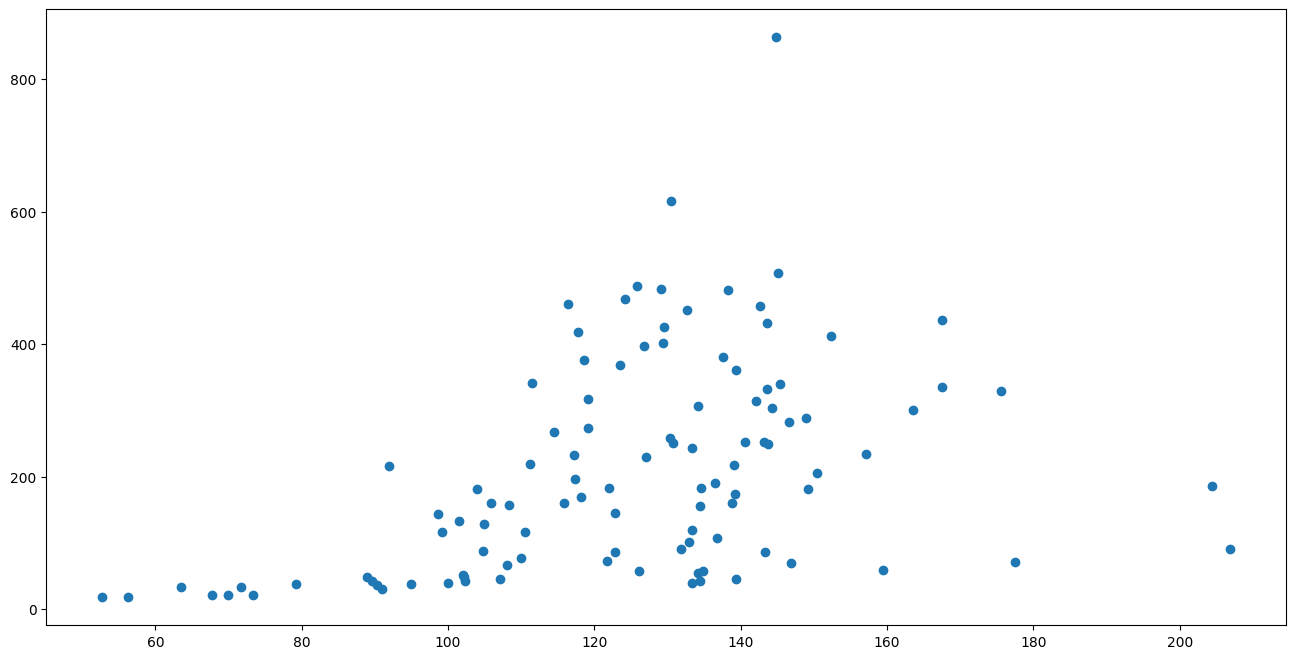

In [33]:
plt.figure(figsize=(16,8))
plt.scatter(df_2022_3.strike_rate, df_2022_3.runs_off_bat)
for i in range(len(df_2022_3)):
    #plt.text(x,y, text)
    plt.text(df_2022_3.strike_rate[i]+0.5, df_2022_3.runs_off_bat[i]-3, df_2022_3.season[i])
plt.axvline(130, ls = "--", color = 'grey')
plt.axhline(300, ls="--", color = 'grey')
plt.title("player strike rate vs runs scored in IPL", fontsize=20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()